In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Veri yükleme

In [497]:
df = pd.read_csv("heart_disease_uci.csv")


- id (Unique id for each patient)
    - int
- age (Age of the patient in years)
    - int
- sex 
    - Male
    - Female
- cp chest pain type
    - typical angina
    - asymptomatic
    - non-anginal
    - atypical angina'
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
    - float
- chol (serum cholesterol in mg/dl)
    - float
- fbs (if fasting blood sugar > 120 mg/dl)
    - True, False
- restecg (resting electrocardiographic results)
    - lv hypertrophy
    - normal
    - st-t abnormality
- thalach: maximum heart rate achieved
    - fixed defect
    - normal
    - reversable defect
- exang: exercise-induced angina 
    - (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
    - float
- slope: the slope of the peak exercise ST segment
    - downsloping
    - flat
    - upsloping
- ca: number of major vessels (0-3) colored by fluoroscopy
    - float: 0-3
- thal: 
    - fixed defect 
    - normal 
    - reversable defect
- num: the predicted attribute
    - int: 0-4


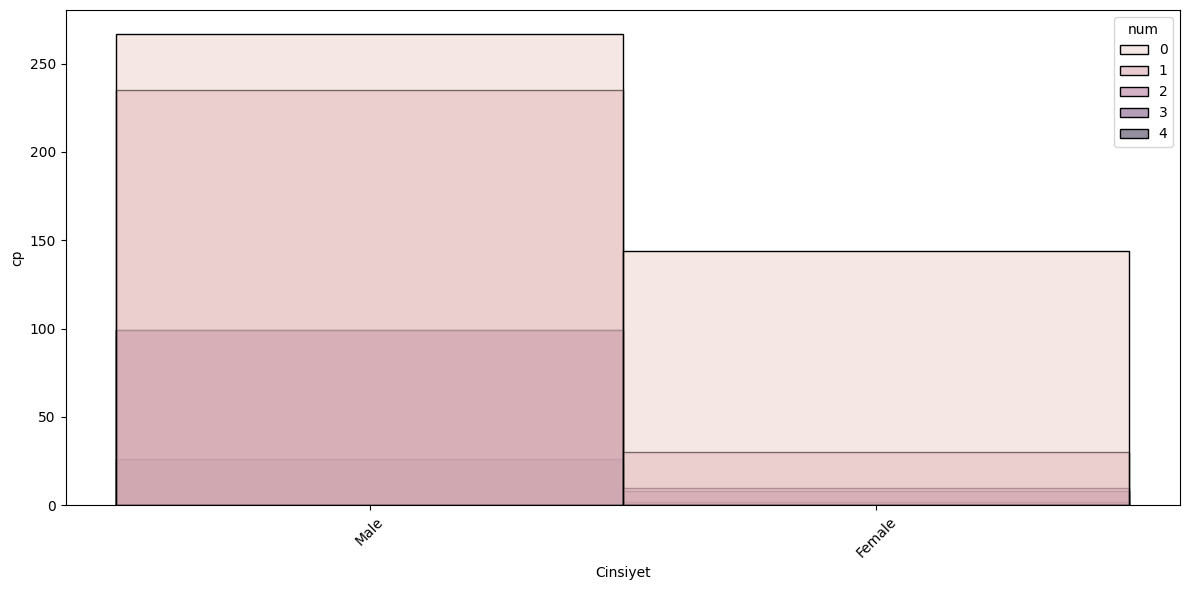

In [531]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="sex", hue="num")
plt.title("")
plt.xlabel("Cinsiyet")
plt.ylabel("cp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

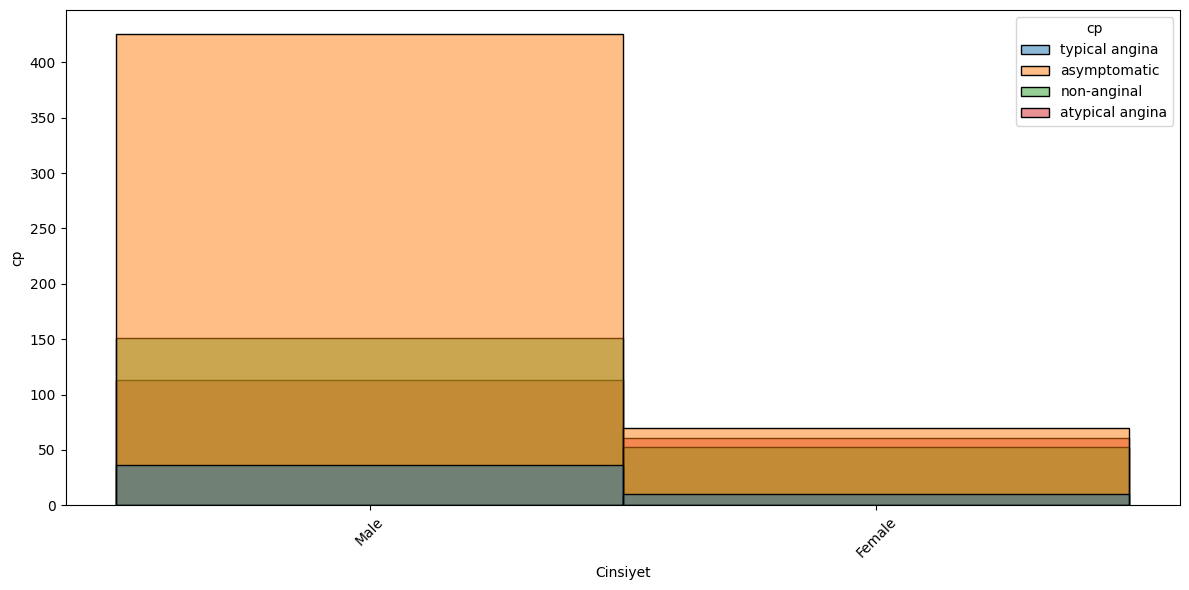

In [495]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="sex", hue="cp")
plt.title("")
plt.xlabel("Cinsiyet")
plt.ylabel("cp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [457]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [458]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# 2 - hangi feature'larda boşluklar var

In [460]:
df.isnull().sum() 

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

- slope (%33 boş), ca (%66 boş), thal(%52) feature'larında çok büyük boşluklar var. Atacağız.
- aşağıdakiler ise doldurulabilir:
    -  trestbps: float64
    -  chol: float64
    -  fbs: object
    -  restecg: object
    -  thalch: float64
    -  exang: object
    -  oldpeak: float64

In [461]:
df = df.drop(["ca", "thal", "slope"], axis="columns")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,0


## Aykırılıklara bakıyoruz ve hangi yöntem ile boşlukları dolduracağımıza karar veriyoruz 

<Axes: >

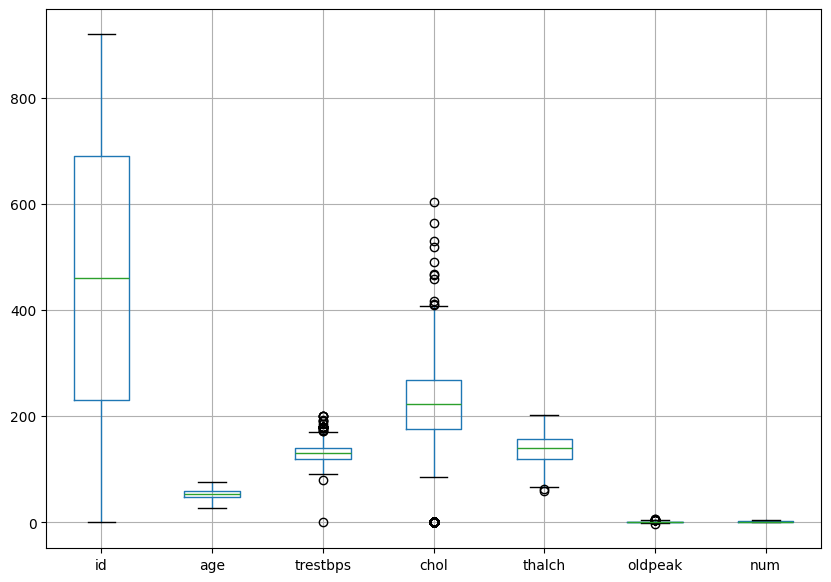

In [462]:
plt.figure(figsize = (10, 7)) 

df.boxplot()

### trestbps: float64 

<Axes: xlabel='trestbps', ylabel='Count'>

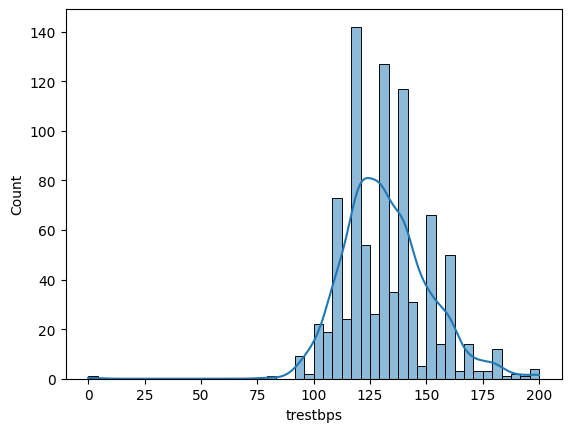

In [463]:
sns.histplot(df["trestbps"], kde=True)

In [464]:
df["trestbps"].skew()

np.float64(0.21333446967212508)

In [465]:
df["trestbps"] = df["trestbps"].fillna(df["trestbps"].mean())

### chol: float64

<Axes: xlabel='chol', ylabel='Count'>

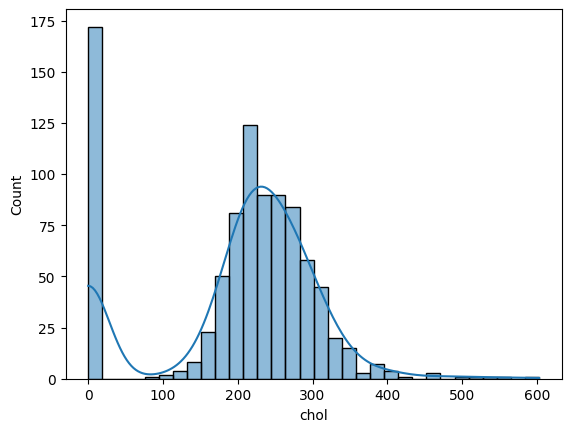

In [466]:
sns.histplot(df["chol"], kde=True)

In [467]:
df["chol"].skew()

np.float64(-0.6138360897370758)

In [468]:
df["chol"] = df["chol"].fillna(df["chol"].mean())

### thalch: float64

<Axes: xlabel='thalch', ylabel='Count'>

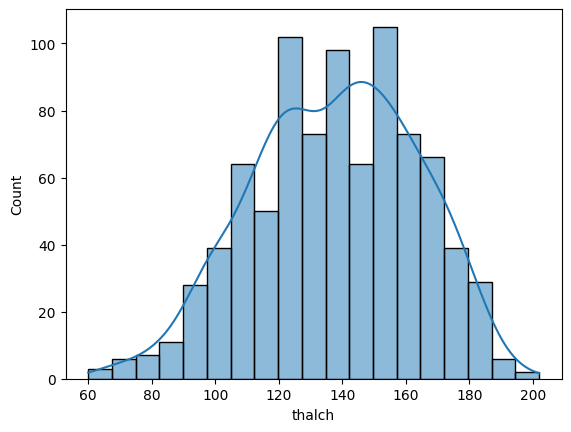

In [469]:
sns.histplot(df["thalch"], kde=True)

In [470]:
df["thalch"].skew()

np.float64(-0.21111858073161133)

In [471]:
df["thalch"] = df["thalch"].fillna(df["thalch"].mean())

### oldpeak: float64

<Axes: xlabel='oldpeak', ylabel='Count'>

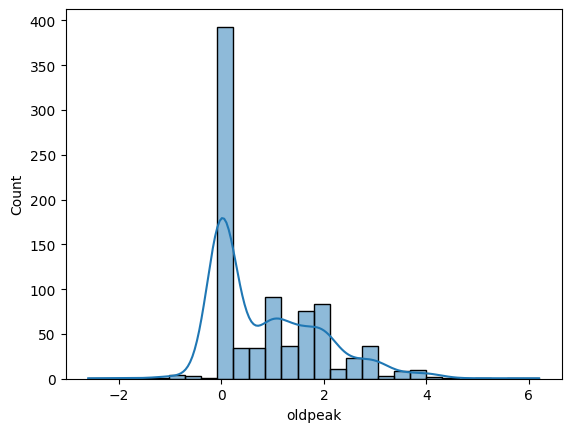

In [472]:
sns.histplot(df["oldpeak"], kde=True)

In [473]:
df["oldpeak"].skew()

np.float64(1.0414266146339854)

In [474]:
df["oldpeak"] = df["oldpeak"].fillna(df["oldpeak"].median())

### restecg: object

In [475]:
df["restecg"] = df["restecg"].fillna(df["restecg"].mode()[0])

### fbs: object

In [476]:
df["fbs"] = df["fbs"].astype(bool)

In [477]:
df["fbs"] = df["fbs"].fillna(df["fbs"].mode()[0])

### exang: object

In [478]:
df["exang"] = df["exang"].astype(bool)

In [479]:
df["exang"] = df["exang"].fillna(df["exang"].mode()[0])

In [430]:
df.isnull().sum() 

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

In [431]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.0,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,True,0.5,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.0,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,True,0.5,0


In [432]:
df[["age", "chol"]]

,age,chol
0,63,233.0
1,67,286.0
2,67,229.0
3,37,250.0
4,41,204.0
...,...,...
915,54,333.0
916,62,139.0
917,55,223.0
918,58,385.0


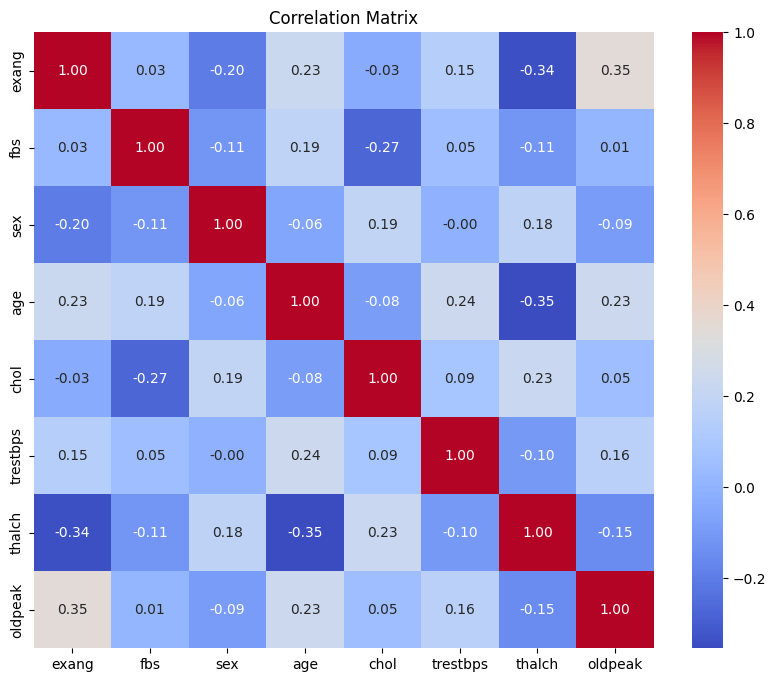

In [486]:
plt.figure(figsize=(10,8))
corr = df[["exang","fbs","sex","age", "chol", "trestbps", "thalch", "oldpeak"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


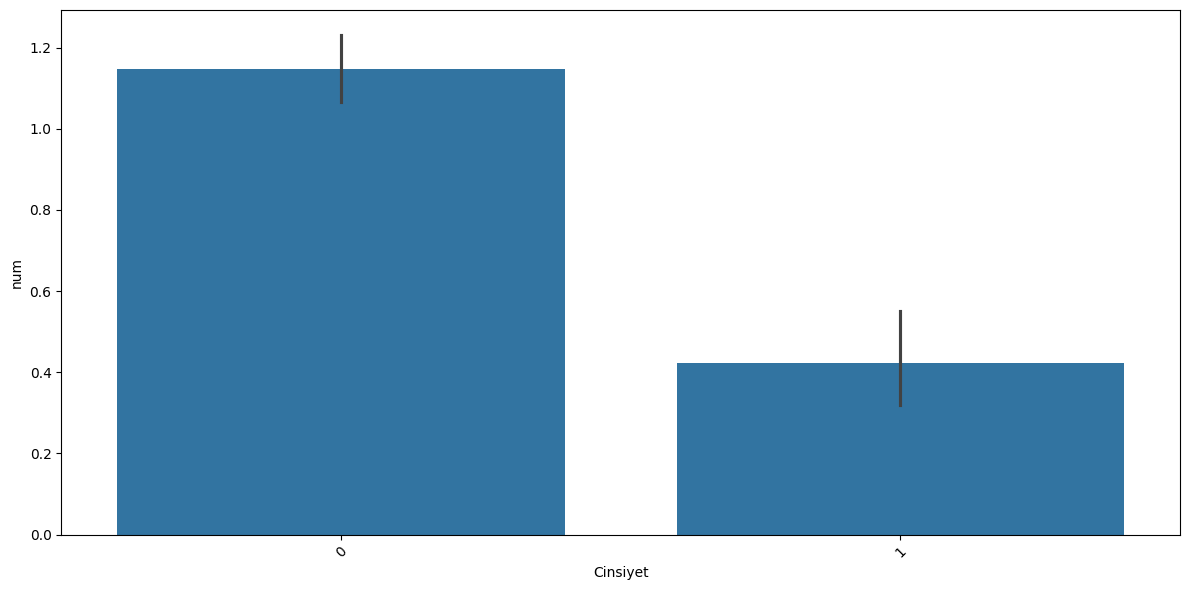

In [487]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="sex", y="num")
plt.title("")
plt.xlabel("Cinsiyet")
plt.ylabel("num")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

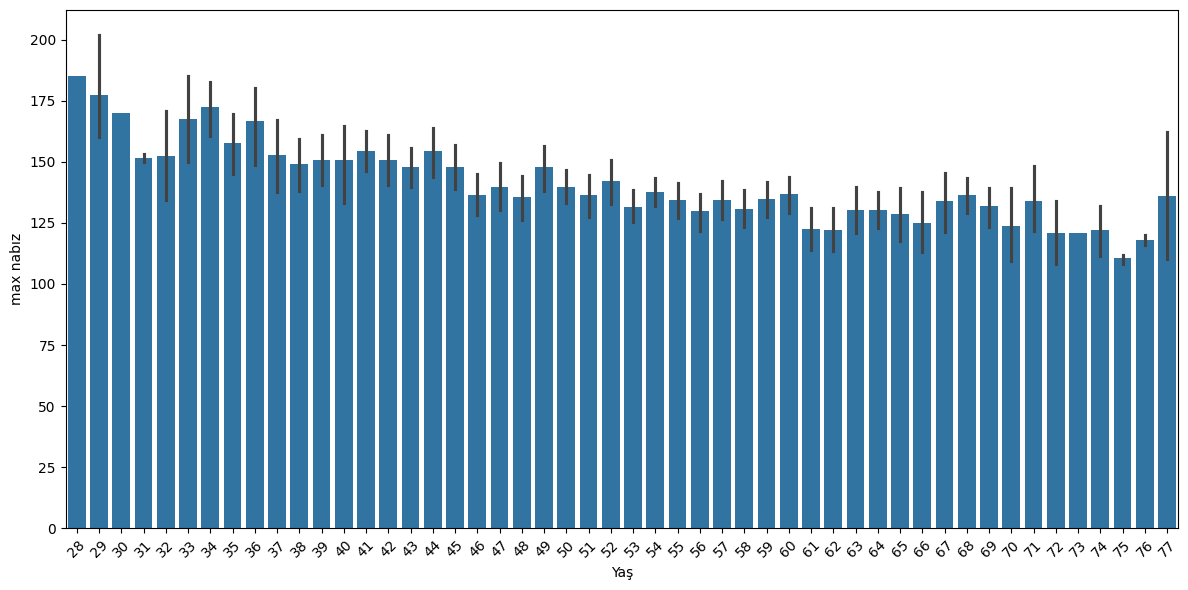

In [452]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="age", y="thalch")
plt.title("")
plt.xlabel("Yaş")
plt.ylabel("max nabız")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## encoding 

In [481]:
# one-hot encoding 
df["fbs"] = df["fbs"].astype(int)
df["exang"] = df["exang"].astype(int)
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

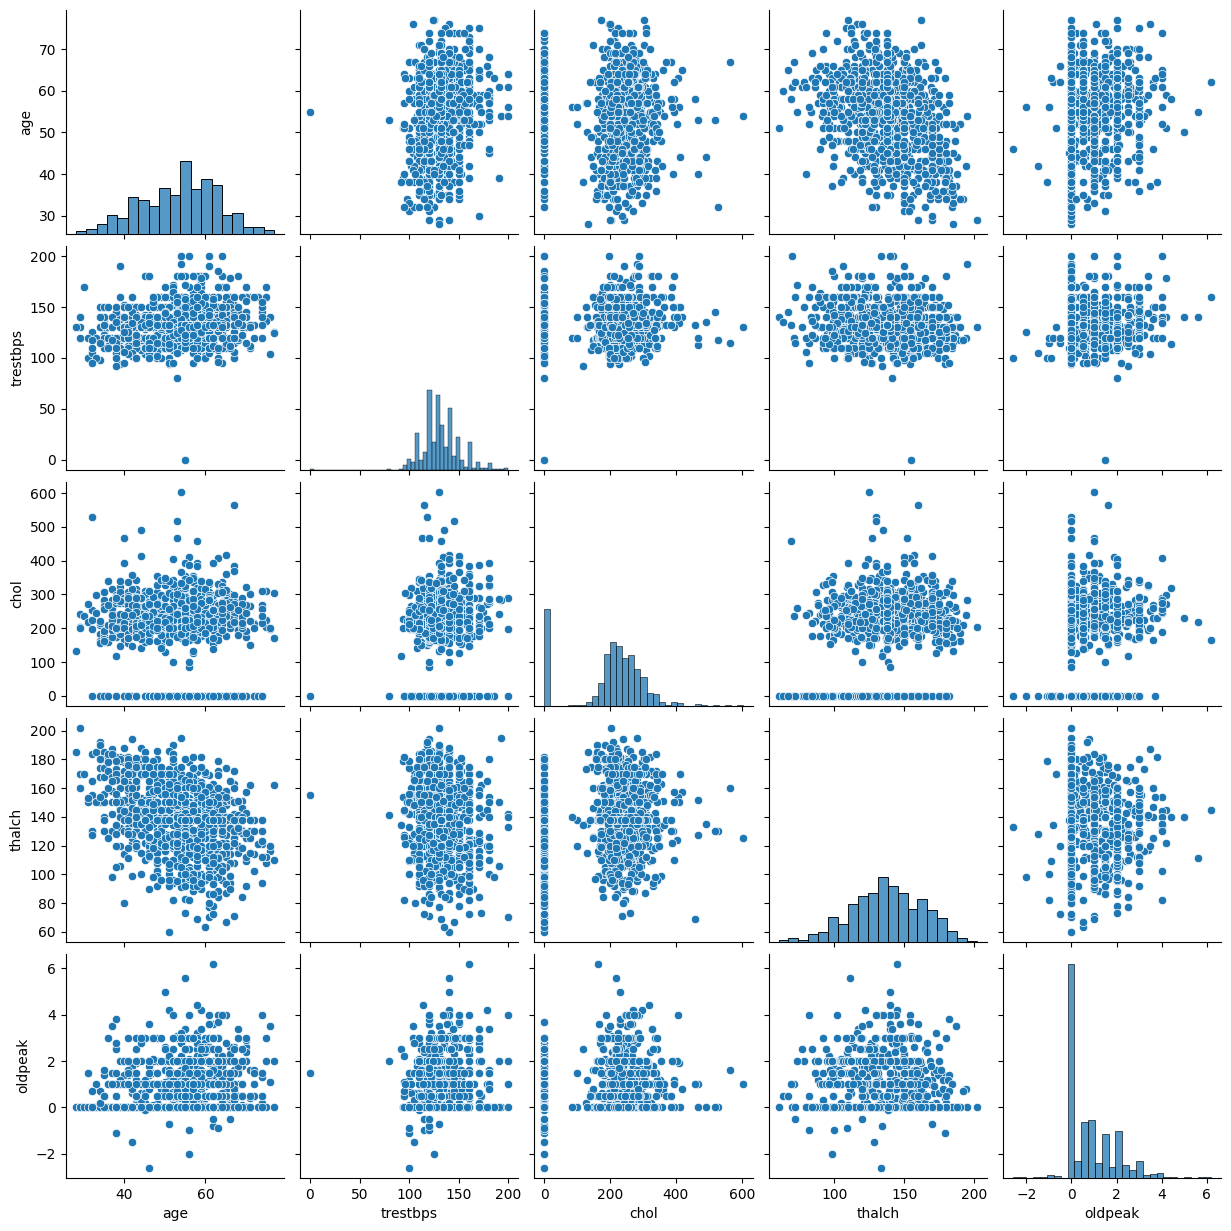

In [404]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])
plt.show()


# Scaling

In [332]:
df["trestbps"] = df["trestbps"]/df["trestbps"].max()

In [333]:
df["thalch"] = df["thalch"]/df["thalch"].max()

In [336]:
df["chol"] = df["chol"]/df["chol"].max()
df["oldpeak"] = df["oldpeak"]/df["oldpeak"].max()


In [337]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,0,Cleveland,typical angina,0.725000,0.386401,1,lv hypertrophy,0.742574,0,0.370968,0
1,2,67,0,Cleveland,asymptomatic,0.800000,0.474295,0,lv hypertrophy,0.534653,1,0.241935,2
2,3,67,0,Cleveland,asymptomatic,0.600000,0.379768,0,lv hypertrophy,0.638614,1,0.419355,1
3,4,37,0,Cleveland,non-anginal,0.650000,0.414594,0,normal,0.925743,0,0.564516,0
4,5,41,1,Cleveland,atypical angina,0.650000,0.338308,0,lv hypertrophy,0.851485,0,0.225806,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,1,VA Long Beach,asymptomatic,0.635000,0.552239,1,st-t abnormality,0.762376,0,0.000000,1
916,917,62,0,VA Long Beach,typical angina,0.660662,0.230514,0,st-t abnormality,0.680919,1,0.080645,0
917,918,55,0,VA Long Beach,asymptomatic,0.610000,0.369818,1,st-t abnormality,0.495050,0,0.000000,2
918,919,58,0,VA Long Beach,asymptomatic,0.660662,0.638474,1,lv hypertrophy,0.680919,1,0.080645,0


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  num       920 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 93.6+ KB


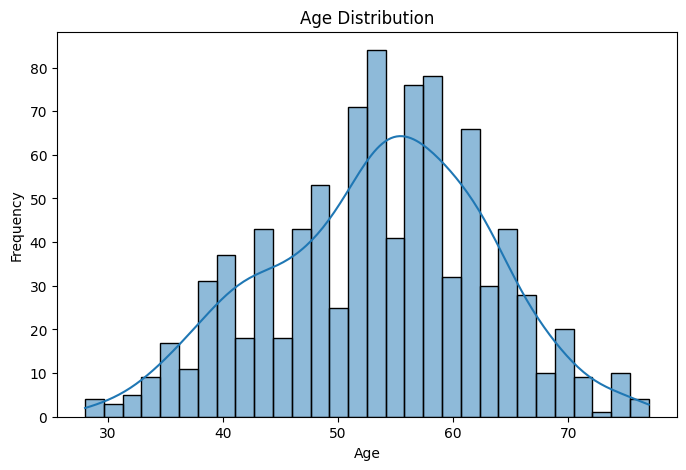

In [341]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)  # kde=True, dağılım eğrisini gösterir
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


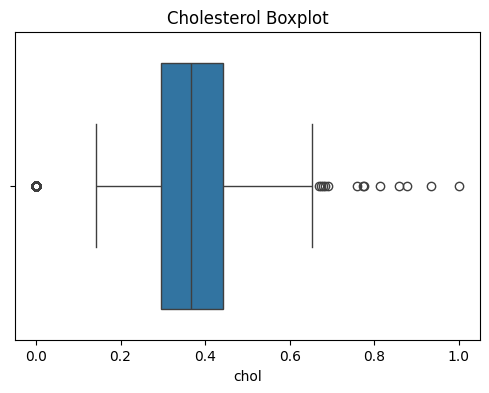

In [342]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['chol'])
plt.title('Cholesterol Boxplot')
plt.show()


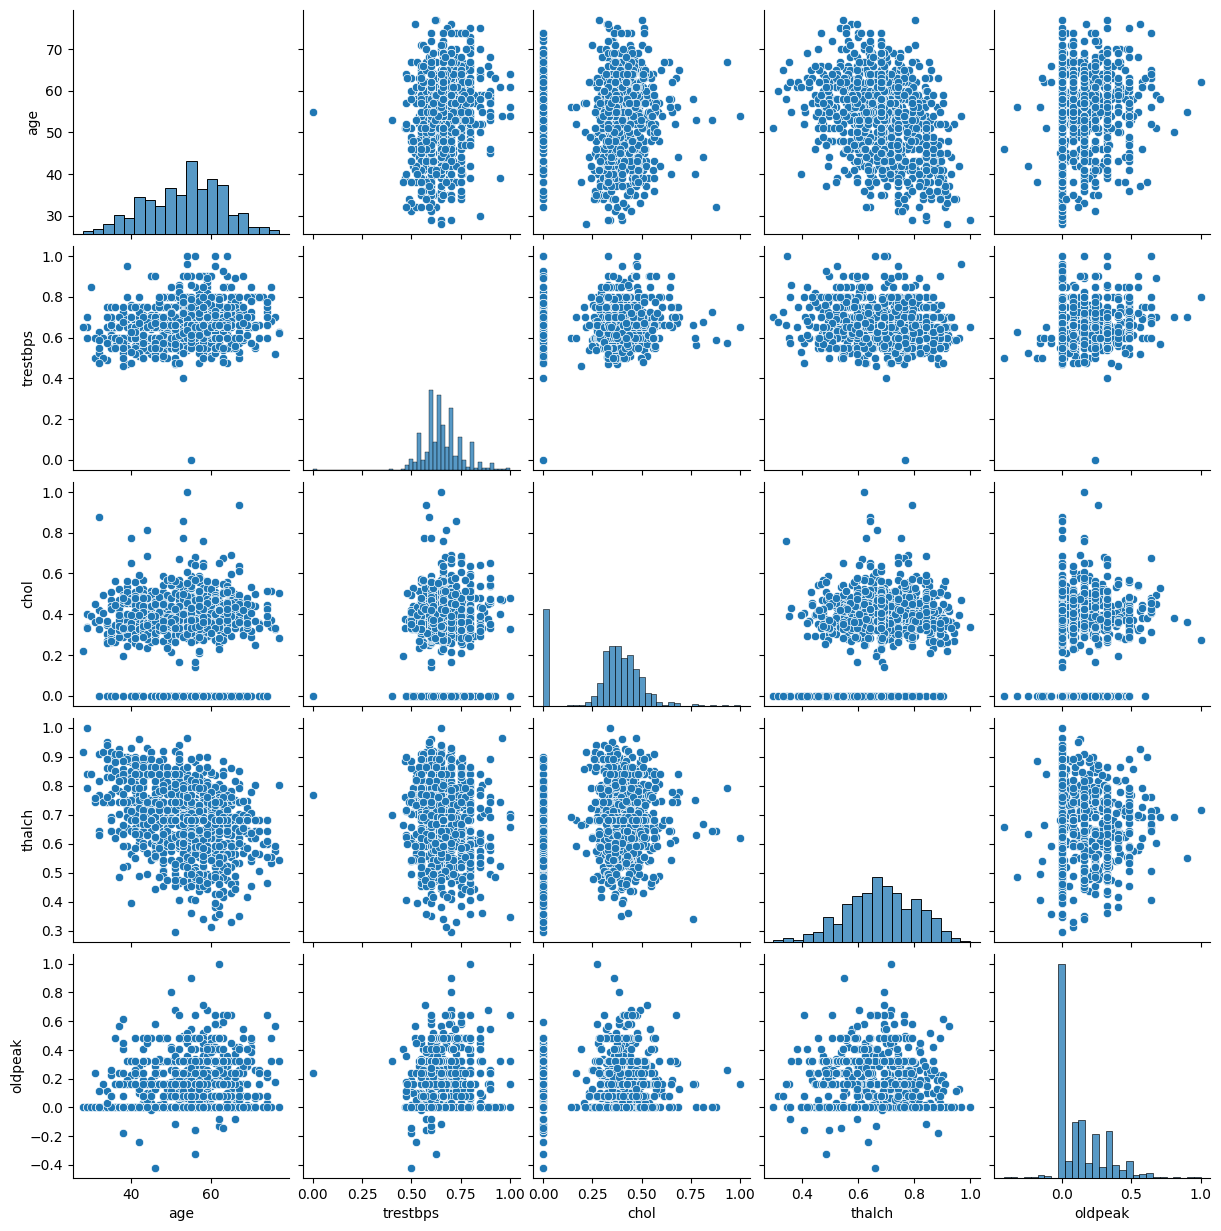

In [343]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])
plt.show()


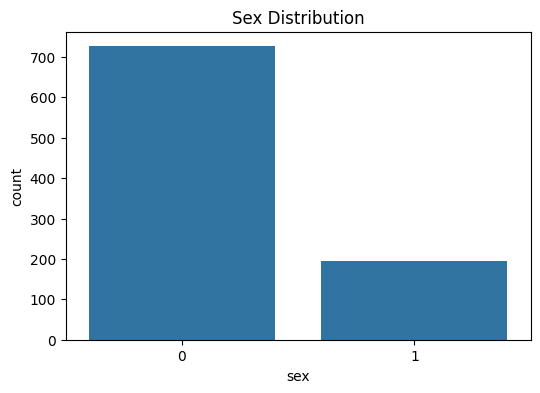

In [344]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()


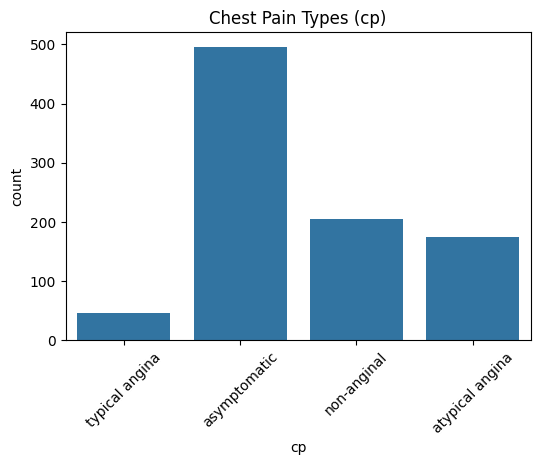

In [345]:
plt.figure(figsize=(6,4))
sns.countplot(x='cp', data=df)
plt.title('Chest Pain Types (cp)')
plt.xticks(rotation=45)
plt.show()


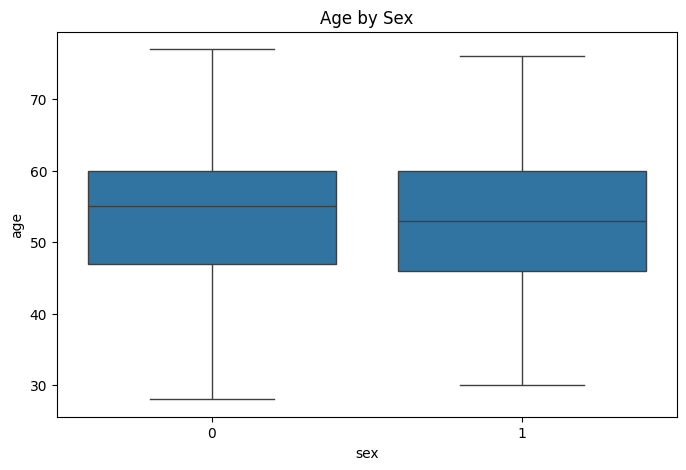

In [346]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sex', y='age', data=df)
plt.title('Age by Sex')
plt.show()


In [351]:
df["dataset"].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [369]:
#df['dataset'] = df['dataset'].map({'Cleveland': 0, 'Hungary': 1, 'Switzerland': 2, 'VA Long Beach': 3})

In [370]:
#df['cp'] = df['cp'].map({'typical angina': 0, 'asymptomatic': 1, 'non-anginal': 2, 'atypical angina': 3})

In [371]:
#df['restecg'] = df['restecg'].map({'lv hypertrophy': 0, 'normal': 1, 'st-t abnormality': 2})

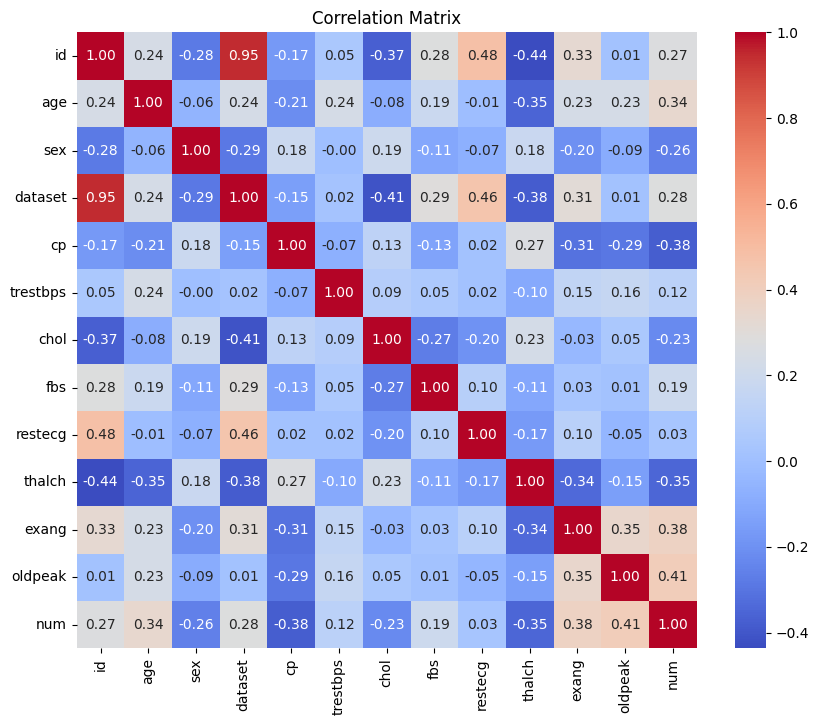

In [372]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
